# Importing dataset

In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv('/kaggle/input/bank-loan-approval-lr-dt-rf-and-auc/bankloan.csv')
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Dataset Information


* ID: Customer ID.
* Age : Customer Age
* Experience : Customer Experience
* Income : Income of the Customer
* ZipCode: Customer's residence zipcode
* Family : No of Family members of the customer
* CCAvg: Credit Card Average Score
* Education: Education of the customer
* Mortgage: Mortgage taken or not taken by the customer
* Personal Loan: 0 = No personal loan given , 1 = personal loan given
* Securities Account : Having or not having a Securities Account
* CD Account : Having or not having a CD Account
* Online : Having or not having online banking
* Credit Card : Having or not having a credit card


# **Project Objective**:

The primary objective of this project is to develop a robust system for loan approval in a banking institution. The bank aims to optimize its loan approval process by leveraging customer demographic and financial data to accurately assess the creditworthiness of applicants. By automating and enhancing the loan approval process, the bank seeks to minimize the risk of default while maximizing the approval rate for deserving applicants. Additionally, the bank aims to streamline its operations, improve customer satisfaction, and maintain regulatory compliance.

# **Quick Summary: Loan Approval Optimization**

This project aimed to improve loan approval processes in a banking institution through demographic and financial data insights, machine learning algorithms, and strategic solutions:

Insights:
- Identified key trends in demographics and finance like income distribution, education, and credit card usage.
- Analyzed correlations between variables such as income, education, and loan approval rates.

Machine Learning:
- Employed diverse algorithms including XGBClassifier, Logistic Regression, and DecisionTreeClassifier.
- XGBClassifier emerged as the top performer based on accuracy, precision, recall, and F1-score.

Solutions:
- Addressed income disparity by creating risk assessment models and introducing income-indexed loan products.
- Focused on education levels by launching outreach programs and financial literacy initiatives.
- Dealt with credit card usage by integrating credit utilization ratios and providing credit counseling services.

In [2]:
#checking data types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

# EDA

In [3]:
#checking for missing values, False means no missing value and True missing the numbers of missing values
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP.Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal.Loan         False
Securities.Account    False
CD.Account            False
Online                False
CreditCard            False
dtype: bool

No missing value in the dataset

In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Descriptive statistics for Age: 
count    5000.0
mean       45.0
std        11.0
min        23.0
25%        35.0
50%        45.0
75%        55.0
max        67.0
Name: Age, dtype: float64


Descriptive statistics for Experience: 
count    5000.0
mean       20.0
std        11.0
min        -3.0
25%        10.0
50%        20.0
75%        30.0
max        43.0
Name: Experience, dtype: float64


Descriptive statistics for Income: 
count    5000.0
mean       74.0
std        46.0
min         8.0
25%        39.0
50%        64.0
75%        98.0
max       224.0
Name: Income, dtype: float64


Descriptive statistics for ZIP.Code: 
count     5000.0
mean     93153.0
std       2122.0
min       9307.0
25%      91911.0
50%      93437.0
75%      94608.0
max      96651.0
Name: ZIP.Code, dtype: float64


Descriptive statistics for Family: 
count    5000.0
mean        2.0
std         1.0
min         1.0
25%         1.0
50%         2.0
75%         3.0
max         4.0
Name: Family, dtype: float64


Descriptive

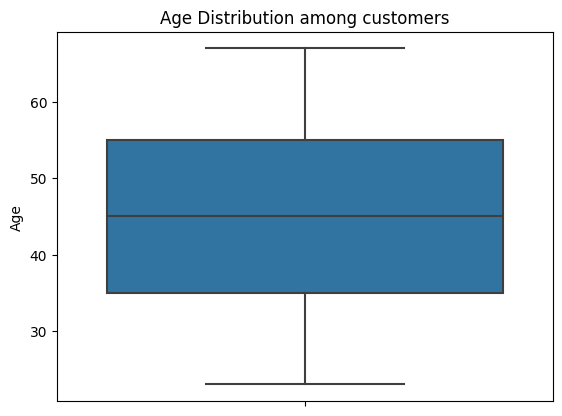

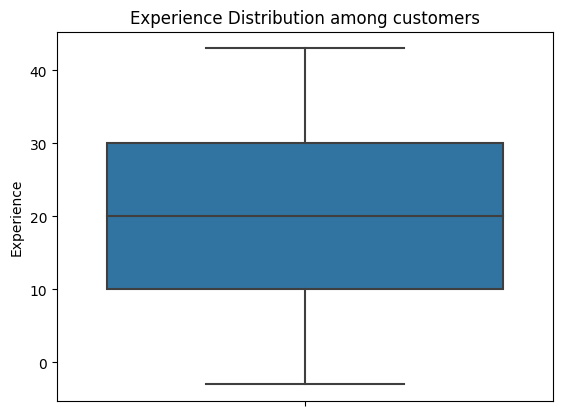

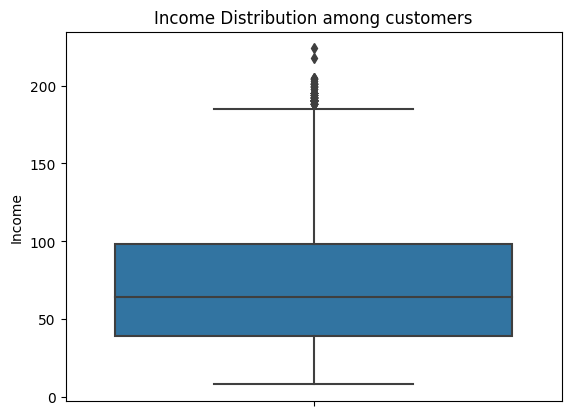

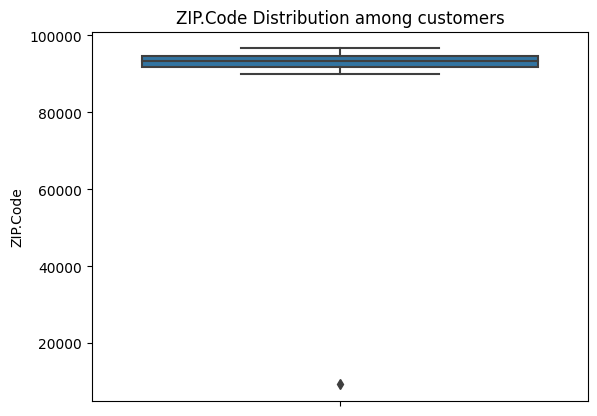

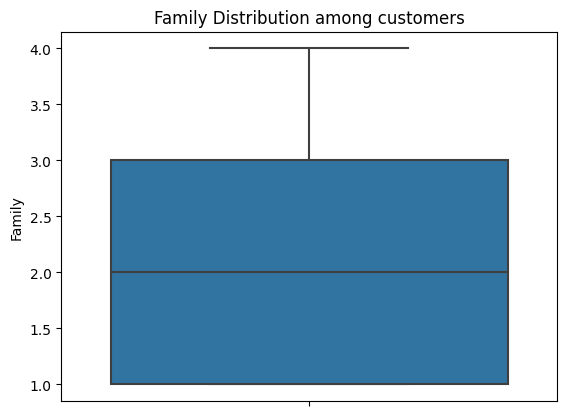

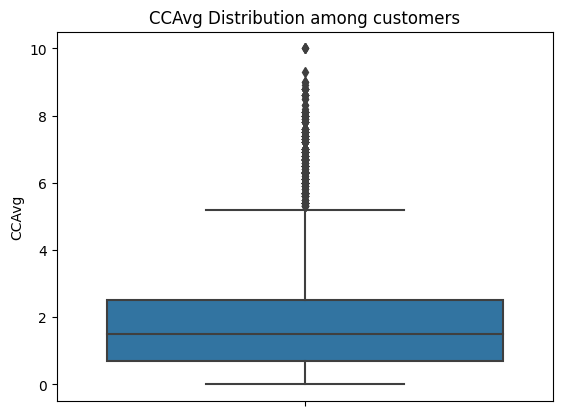

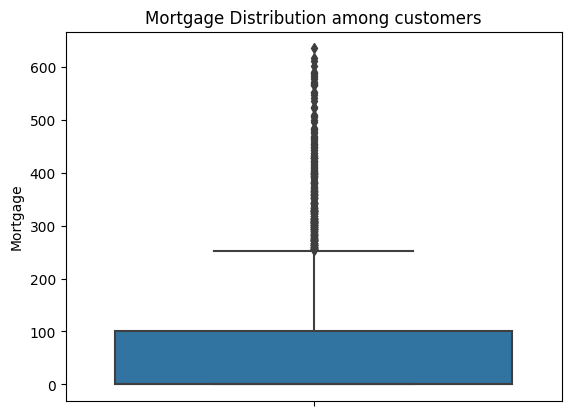

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Exclude specific columns from numerical analysis
excluded_columns = ['ID', 'Education', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']
numerical_columns = [col for col in data.columns if col not in excluded_columns]

for col in numerical_columns:
    print(f"Descriptive statistics for {col}: ")
    print(data[col].describe().round())
    print("\n")

# Plot boxplot for each numerical column
for col in numerical_columns:
    sns.boxplot(y=col, data=data)
    plt.title(f'{col} Distribution among customers')
    plt.show()


# Key Observations from Descriptive Statistics


1. **Age**:
   - Mean age: 45 years
   - Median age (50th percentile): 45 years
   - Age ranges from 23 to 67 years
   - The majority of individuals fall within the range of 35 to 55 years, as indicated by the interquartile range (IQR) of 35 to 55 years.

2. **Experience**:
   - Mean experience: 20 years
   - Median experience (50th percentile): 20 years
   - Experience varies from -3 to 43 years, with negative values indicating potential data entry errors or anomalies.
   - The IQR suggests that most individuals have experience ranging from 10 to 30 years.

3. **Income**:
   - Mean income: 73.8 dollars, approximately  74 dollars
   - Median income (50th percentile): 64 dollars
   - Income spans from 8 dollars to 224 dollars, reflecting a wide range of income levels.
   - The IQR indicates that the majority of individuals earn between 39 dollars and 98 dollars.

4. **ZIP Code**:
   - ZIP codes range from 9307 to 96651.
   - Mean ZIP code: 93153
   - The distribution of ZIP codes across the dataset is not analyzed by statistical measures like quartiles, as ZIP codes are categorical or nominal data.

5. **Family**:
   - Mean family size: 2 members
   - Median family size (50th percentile): 2 members
   - Family size varies from 1 to 4 members, with the majority falling between 1 and 3 members.
   - The IQR suggests that most individuals belong to families with 1 to 3 members.

6. **CCAvg (Credit Card Average)**:
   - Mean credit card spending: 2 dollars
   - Median credit card spending (50th percentile): 2 dollars
   - Credit card spending ranges from 0 dollars to 10 dollars.
   - The IQR indicates that the majority of individuals spend between 1 dollars and 2 dollars on credit cards on average.

7. **Mortgage**:
   - Mean mortgage amount: 56 dollars
   - Median mortgage amount (50th percentile): 0 dollars
   - Mortgages range from 0 dollars to 635 dollars, with a wide variability in mortgage amounts.
   - The IQR suggests that most individuals have mortgages between 0 dollars and 101 dollars, with a significant proportion having no mortgage.


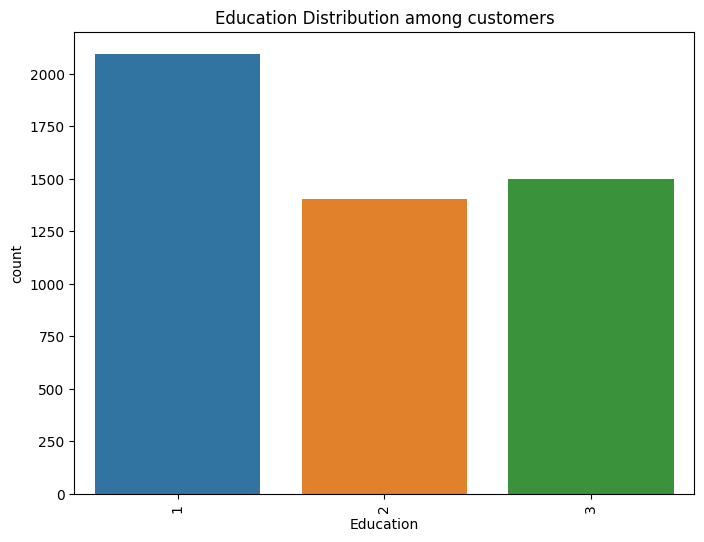

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64




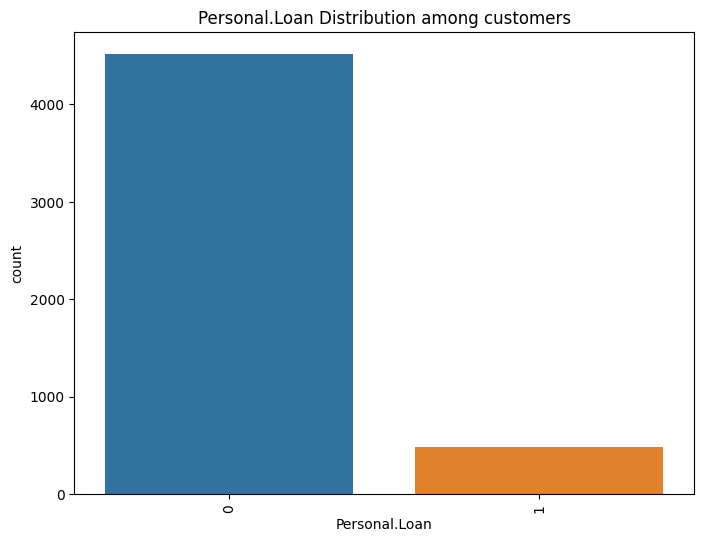

Personal.Loan
0    4520
1     480
Name: count, dtype: int64




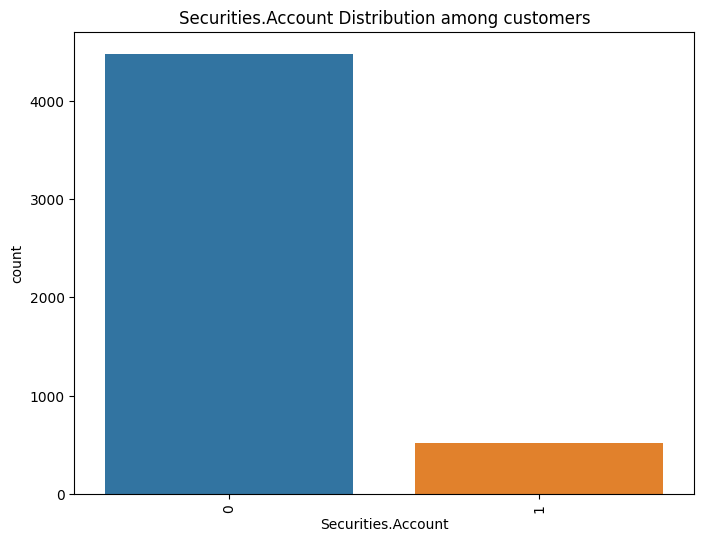

Securities.Account
0    4478
1     522
Name: count, dtype: int64




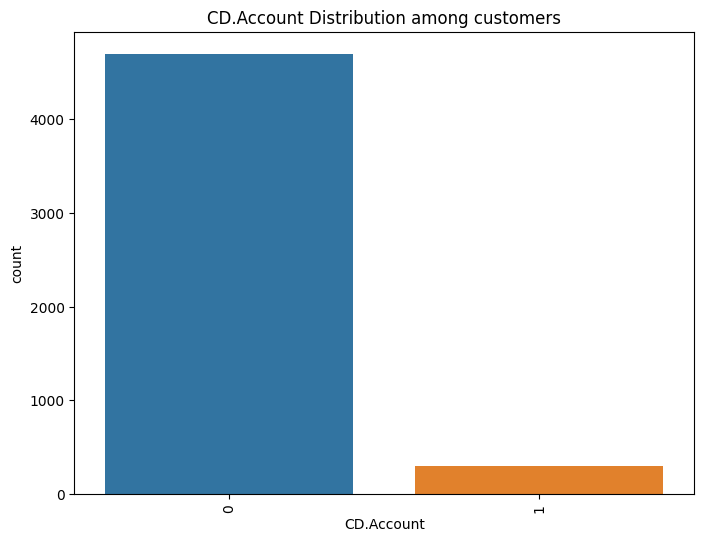

CD.Account
0    4698
1     302
Name: count, dtype: int64




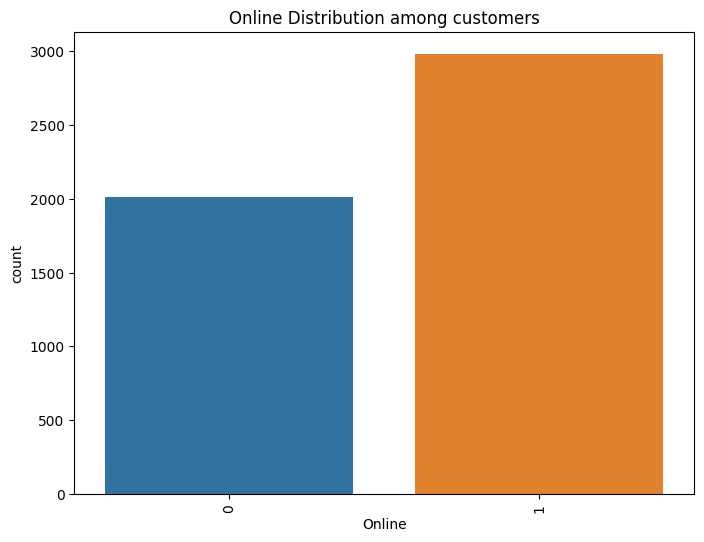

Online
1    2984
0    2016
Name: count, dtype: int64




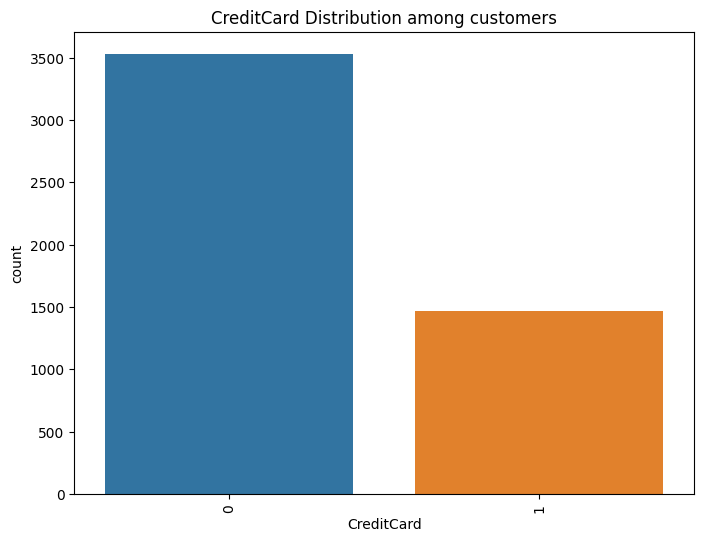

CreditCard
0    3530
1    1470
Name: count, dtype: int64




In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude specific columns from categorical analysis
excluded_columns = ['ID', 'Age', 'Experience','Mortgage', 'Income', 'ZIP.Code', 'Family', 'CCAvg']
categorical_columns = [col for col in data.columns if col not in excluded_columns]

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'{col} Distribution among customers')
    plt.xticks(rotation=90)
    plt.show()

    # Print values and counts
    print(data[col].value_counts())
    print("\n")


# Key Observation: Distribution of Categorical Variables among Customers

The analysis reveals the distribution of categorical variables among customers in the dataset.

- **Education**: The majority of customers have a high school education (1), followed by postgraduate (3) and university (2) education levels. The counts for each education level are as follows:
  - High School (1): 2096 customers
  - University (2): 1403 customers
  - Postgraduate (3): 1501 customers

- **Personal Loan**: A significant majority of customers (4520) have not been approved for a personal loan (0), while a smaller proportion (480) have been approved (1).
- **Securities Account**: Most customers (4478) do not have a securities account (0), while a smaller portion (522) possess one (1).
- **CD Account**: Similarly, the majority of customers (4698) do not have a CD account (0), whereas a smaller group (302) do (1).
- **Online Banking**: A higher number of customers (2984) use online banking services (1) compared to those who do not (2016) (0).
- **Credit Card**: The dataset contains more customers (3530) without credit cards (0) than those with credit cards (1470) (1).


                count   mean   std   min    25%    50%    75%    max
Personal.Loan                                                       
0              4520.0   66.0  41.0   8.0   35.0   59.0   84.0  224.0
1               480.0  145.0  32.0  60.0  122.0  142.0  172.0  203.0


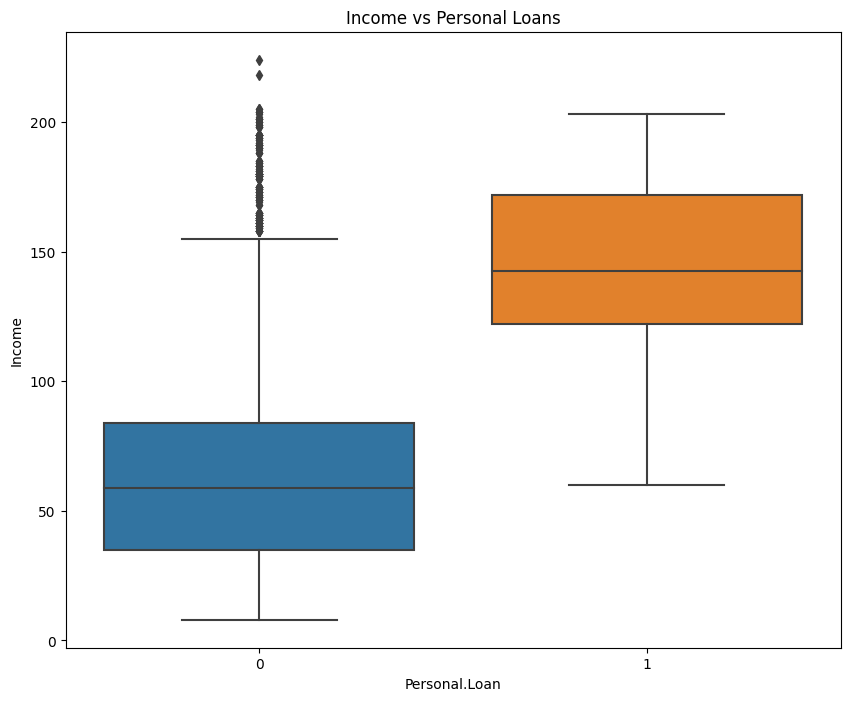

In [8]:
loan_income_stats= data.groupby('Personal.Loan')['Income'].describe().round()
print(loan_income_stats)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Personal.Loan', y='Income', data=data)
plt.title('Income vs Personal Loans')
plt.show()

# **Key Observation: Income Disparity between Loan Applicants and Non-Applicants**

The analysis compares the income distributions between customers who have been approved for personal loans and those who have not.

- **Non-Applicants (Personal Loan = 0)**: The dataset comprises 4520 customers who have not been approved for personal loans. The mean income for this group is 66 dollars, with a standard deviation of approximately 41 dollars. The income distribution ranges from a minimum of 8 dollars to a maximum of 224 dollars. The median income (50th percentile) is 59 dollars, with 25% of customers earning less than 35 dollars and 75% earning less than 84 dollars.

- **Applicants (Personal Loan = 1)**: On the other hand, there are 480 customers who have been approved for personal loans. This group exhibits a notably higher mean income of 145 dollars, with a smaller standard deviation of approximately 32 dollars. The income range for approved loan applicants spans from 60 dollars to 203 dollars. The median income (50th percentile) is 142 dollars, with 25% of customers earning less than 122 dollars and 75% earning less than 172 dollars.

            count  mean  std   min   25%   50%   75%   max
Experience                                                
-3            4.0  24.0  1.0  23.0  23.0  24.0  24.0  24.0
-2           15.0  24.0  1.0  23.0  24.0  24.0  24.0  28.0
-1           33.0  25.0  2.0  23.0  24.0  25.0  25.0  29.0
 0           66.0  26.0  1.0  24.0  25.0  26.0  26.0  30.0
 1           74.0  27.0  1.0  25.0  26.0  26.0  27.0  31.0
 2           85.0  27.0  1.0  26.0  26.0  27.0  28.0  32.0
 3          129.0  28.0  1.0  27.0  27.0  28.0  29.0  33.0
 4          113.0  29.0  1.0  28.0  28.0  29.0  30.0  34.0
 5          146.0  30.0  1.0  29.0  29.0  30.0  31.0  35.0
 6          119.0  31.0  2.0  30.0  30.0  31.0  32.0  36.0
 7          121.0  32.0  1.0  31.0  31.0  32.0  33.0  37.0
 8          119.0  33.0  1.0  32.0  32.0  33.0  34.0  38.0
 9          147.0  34.0  1.0  33.0  34.0  34.0  35.0  39.0
 10         118.0  35.0  1.0  34.0  34.0  35.0  36.0  40.0
 11         116.0  36.0  1.0  35.0  35.0  36.0  37.0  41

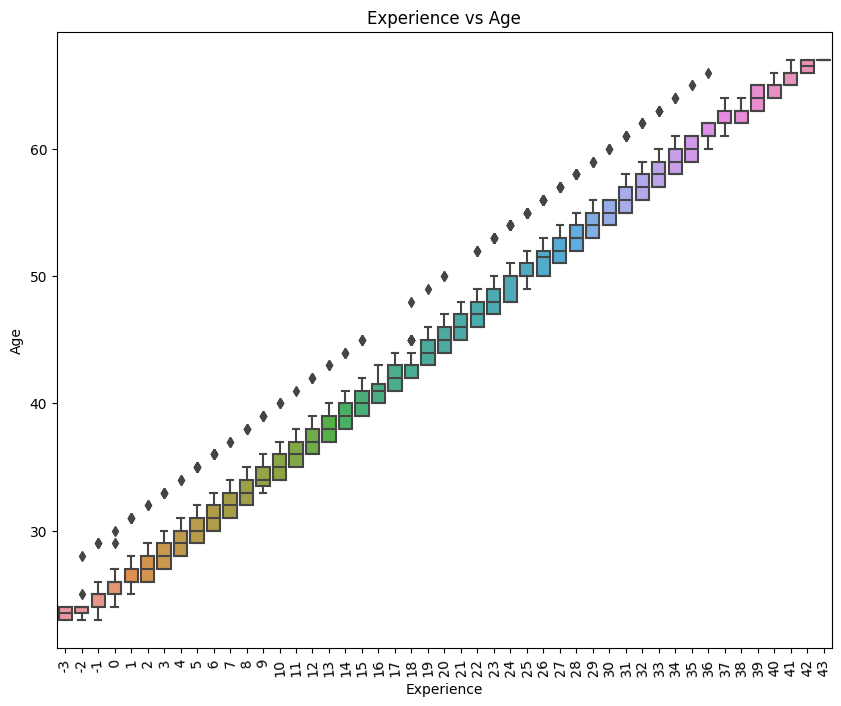

In [51]:
exp_age_stat= data.groupby('Experience')['Age'].describe().round()
print(exp_age_stat)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Experience', y='Age', data=data)
plt.title('Experience vs Age')
plt.xticks(rotation=95)
plt.show()

# **Key Observation: Relationship Between Experience and Age**

The analysis investigates the relationship between a customer's experience and their age. Here are the key observations:

- **Age Distribution by Experience**: As experience increases, there's a general trend of an older age group. For instance, customers with negative experience (-3 to -1 years) tend to be younger, with the mean age ranging from 24 to 25 years. However, as experience becomes positive (0 to 43 years), the mean age gradually increases, reaching a peak of 45 years for customers with 20 years of experience.

- **Consistency in Age Range**: Despite variations in experience levels, the age range remains relatively consistent, typically spanning from the mid-20s to mid-60s. However, there are outliers at both ends of the spectrum, such as customers with negative experience having ages as young as 23 and those with extensive experience having ages up to 67.

Personal.Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205


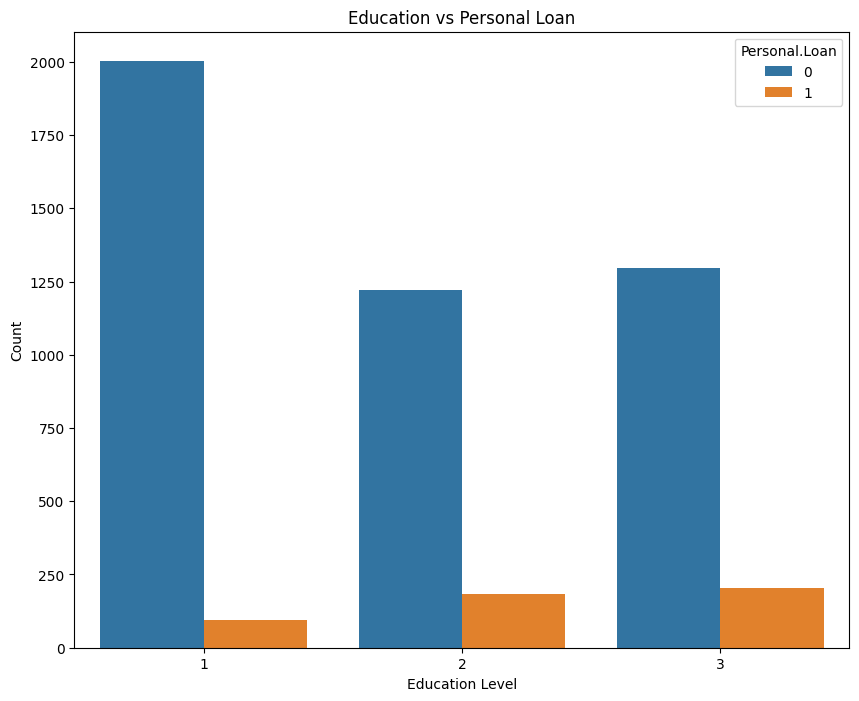

In [10]:
edu_loan= data.groupby(['Education', 'Personal.Loan']).size().reset_index(name='Count')
#pivoting the dataframe to have 'education' as index and 'personal loan' as columns
edu_loan_pivot= edu_loan.pivot(index='Education', columns='Personal.Loan', values='Count')
#filling nan values with 0(for cases where there are no occurrences)
edu_loan_pivot= edu_loan_pivot.fillna(0)

print(edu_loan_pivot)



plt.figure(figsize=(10, 8))
sns.countplot(x='Education', hue='Personal.Loan', data=data)
plt.title('Education vs Personal Loan')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# **Key Observation: Education Level and Personal Loan Approval**

The analysis explores the relationship between education level and the approval of personal loans. Here are the key observations:

- **Distribution Across Education Levels**: The data indicates that customers with a higher education level tend to have a higher count of approved personal loans. Specifically, among customers with education level 1 (assumed to be high school), there are 93 instances of approved personal loans, compared to 182 for education level 2 (university), and 205 for education level 3 (postgraduate).

- **Education Level Impact**: There appears to be a positive correlation between higher education levels and the likelihood of personal loan approval. Postgraduate customers (education level 3) have the highest count of approved loans, followed by university-educated customers (education level 2), and then high school-educated customers (education level 1).

         count  mean  std  min  25%  50%  75%   max
Family                                             
1       1472.0   2.0  2.0  0.0  1.0  2.0  3.0  10.0
2       1296.0   2.0  2.0  0.0  1.0  2.0  3.0   9.0
3       1010.0   2.0  1.0  0.0  1.0  1.0  2.0  10.0
4       1222.0   2.0  1.0  0.0  1.0  2.0  2.0   9.0


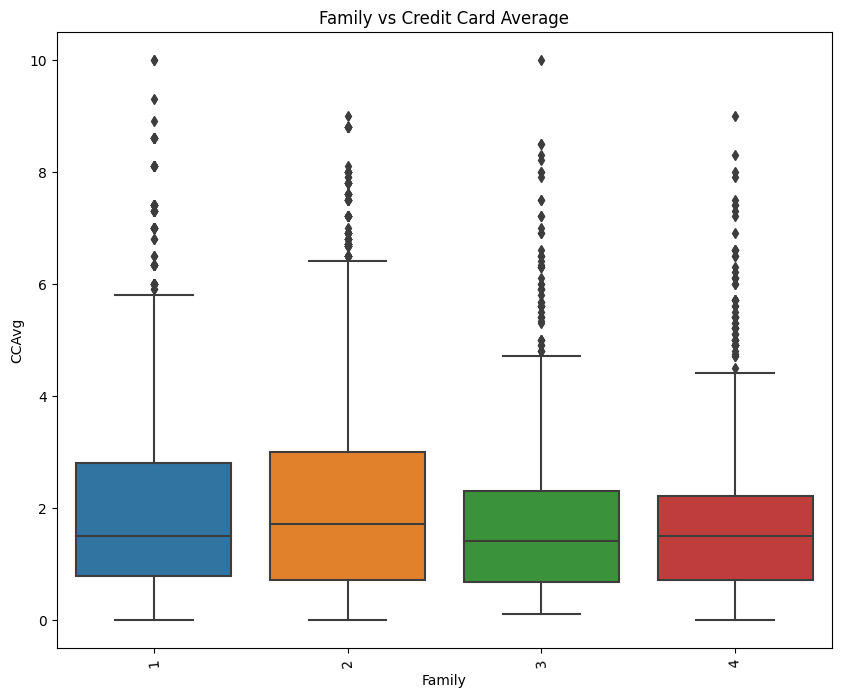

In [54]:
fam_ccavg_stat= data.groupby('Family')['CCAvg'].describe().round()
print(fam_ccavg_stat)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Family', y='CCAvg', data=data)
plt.title('Family vs Credit Card Average')
plt.xticks(rotation=95)
plt.show()

# **Key Observation: Family Size and Credit Card Average**

The analysis investigates the relationship between family size and the average credit card spending (CCAvg). Here's the key observation:

- **Credit Card Spending by Family Size**: The data suggests that there is minimal variation in the average credit card spending across different family sizes. Regardless of family size, the mean CCAvg remains relatively consistent at around 2.0.

- **Consistent Patterns**: Whether the family size is 1, 2, 3, or 4, the median (50th percentile) of CCAvg remains low, with most values around 1.0 or 2.0. However, there is a slight difference in the median for families with size 3, which is lower at 1.0 compared to the other family sizes.

            count  mean   std  min   25%   50%    75%    max
Education                                                   
1          2096.0  86.0  49.0  8.0  44.0  79.0  123.0  224.0
2          1403.0  64.0  41.0  8.0  34.0  54.0   83.0  201.0
3          1501.0  66.0  42.0  8.0  35.0  59.0   84.0  203.0


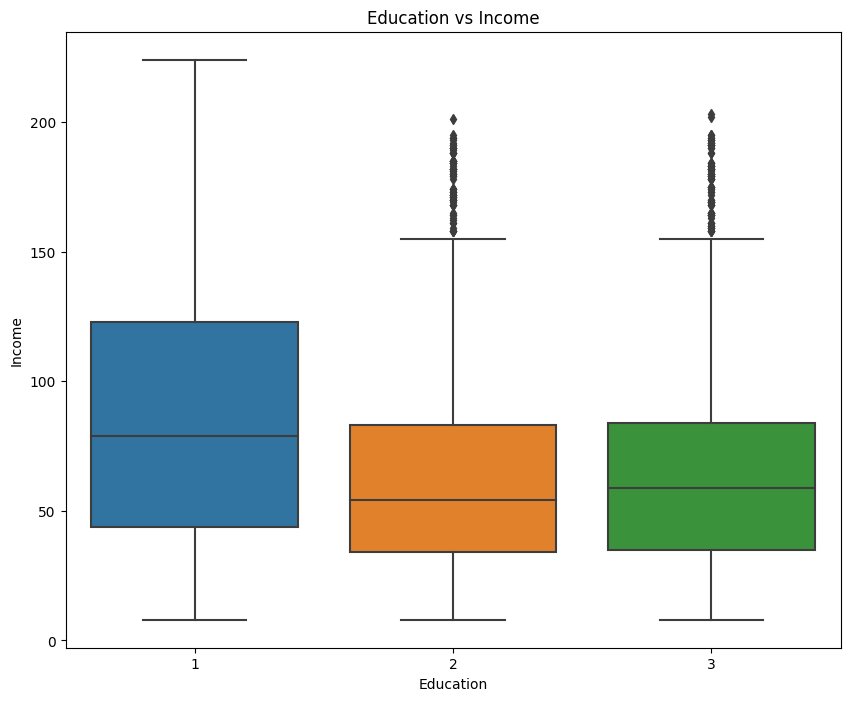

In [59]:
eud_income_stat= data.groupby('Education')['Income'].describe().round()
print(eud_income_stat)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Education vs Income')
plt.show()

# **Key Observation: Education Level and Income**

The analysis explores the relationship between education level and income. Here's the key observation:

- **Income Variation Across Education Levels**: There is noticeable variation in income levels across different education levels. 
  - For individuals with a high school education (Education Level 1), the mean income is around 86 dollars.
  - Those with a university education (Education Level 2) have a slightly lower mean income of approximately 64 dollars.
  - Individuals with postgraduate education (Education Level 3) also have a mean income similar to those with a university education, around 66 dollars.

- The analysis reveals variations in income distribution across different education levels. Among individuals with a high school education (Education Level 1), the interquartile range (IQR) spans from 44 dollars to 123 dollars, indicating substantial income diversity within this group. Similarly, for those with a university education (Education Level 2), the IQR extends from 34 dollars to 83 dollars, showcasing a notable spread in income levels. Conversely, individuals with postgraduate education (Education Level 3) exhibit an IQR ranging from 35 dollars to 84 dollars, highlighting a relatively narrower range compared to the other education levels. These findings underscore the disparities in income distribution across various educational backgrounds.



         count  mean  std  min  25%  50%  75%   max
Online                                             
0       2016.0   2.0  2.0  0.0  1.0  2.0  2.0  10.0
1       2984.0   2.0  2.0  0.0  1.0  2.0  2.0   9.0


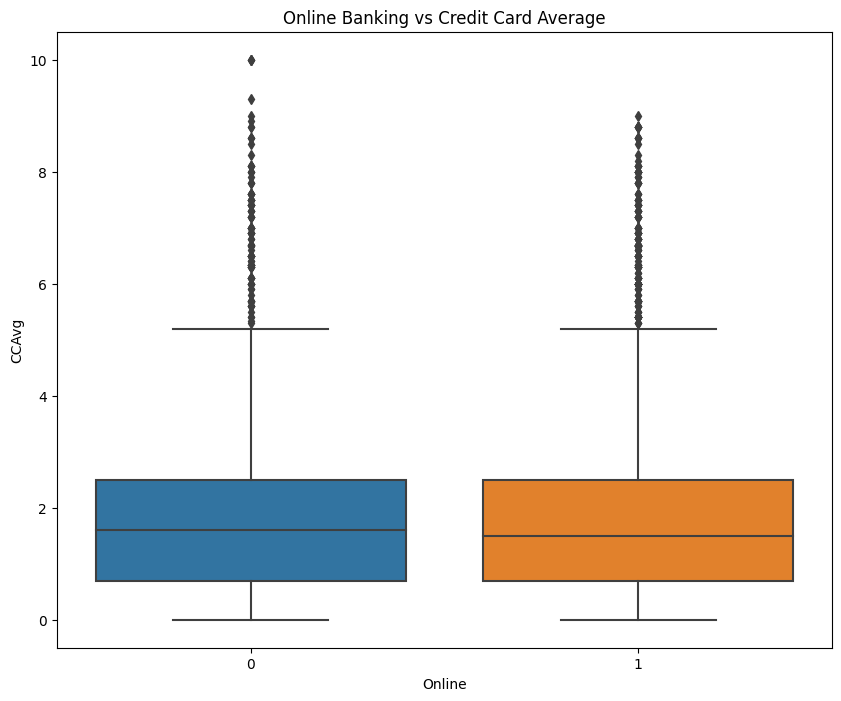

In [60]:
online_ccavg_stat= data.groupby('Online')['CCAvg'].describe().round()
print(online_ccavg_stat)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Online', y='CCAvg', data=data)
plt.title('Online Banking vs Credit Card Average')
plt.show()

# **Key Observation : Impact of Online Banking on Credit Card Average Spending**

The analysis illustrates that individuals utilizing online banking services tend to have similar credit card average spending patterns compared to those who do not use online banking. Both groups exhibit a median credit card average of 2, with interquartile ranges (IQR) spanning from 1 to 2. This suggests that online banking usage does not significantly influence credit card spending behavior.


CD.Account             0    1
Securities.Account           
0                   4323  155
1                    375  147


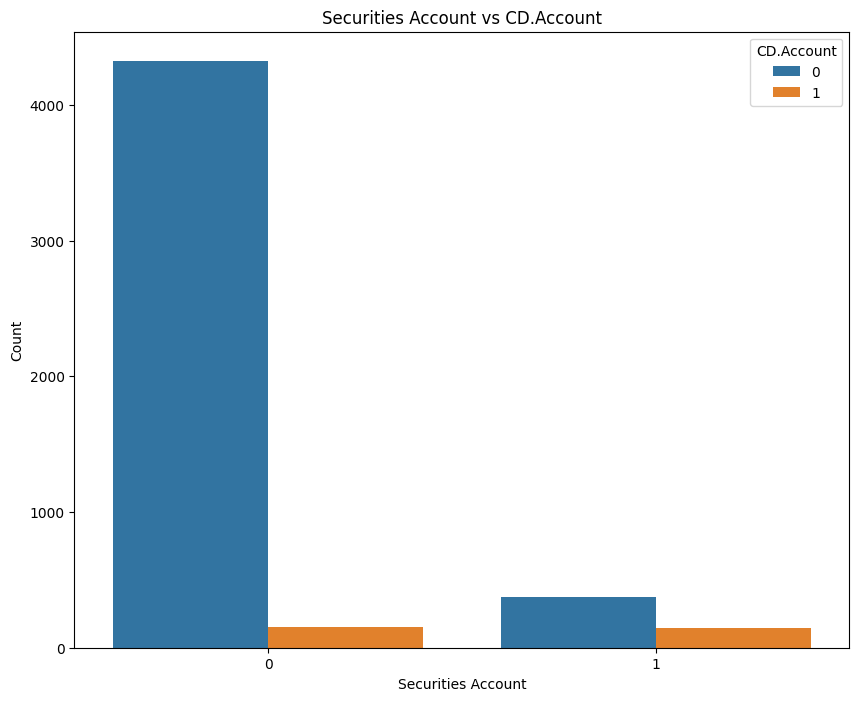

In [14]:
security_cd= data.groupby(['Securities.Account', 'CD.Account']).size().reset_index(name='Count')
#pivoting the dataframe to have 'Securities.Account' as index and 'CD.Account' as columns
security_cd_pivot= security_cd.pivot(index='Securities.Account', columns='CD.Account', values='Count')
#filling nan values with 0(for cases where there are no occurrences)
security_cd_pivot= security_cd_pivot.fillna(0)

print(security_cd_pivot)



plt.figure(figsize=(10, 8))
sns.countplot(x='Securities.Account', hue='CD.Account', data=data)
plt.title('Securities Account vs CD.Account')
plt.xlabel('Securities Account')
plt.ylabel('Count')
plt.show()

# **Key Observation: Relationship Between Securities Account and CD Account Ownership**


The analysis reveals that customers who do not hold securities accounts tend to have significantly higher numbers of CD accounts compared to those who do. Among customers without securities accounts, the majority (4323) do not possess CD accounts, while only 155 have CD accounts. In contrast, among customers with securities accounts, the distribution between those without CD accounts (375) and those with CD accounts (147) is relatively more balanced.


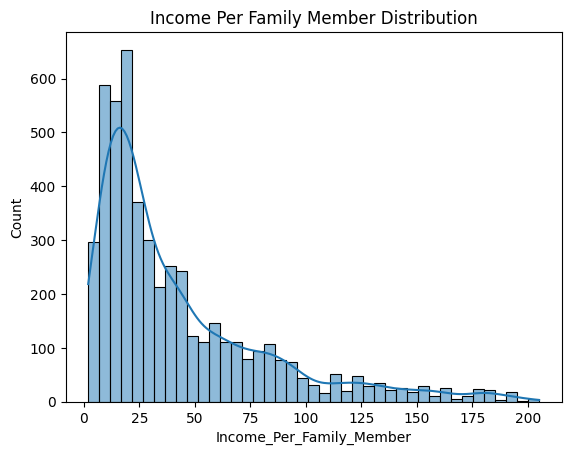

In [15]:
data['Income_Per_Family_Member']= data['Income']/ data['Family']

sns.histplot(x='Income_Per_Family_Member', data=data, kde=True)
plt.title('Income Per Family Member Distribution')
plt.show()

# **Key Observation: Positive Skew in Income Per Family Member Distribution**

The distribution of income per family member exhibits a positive skew, indicating that a majority of families have relatively lower income per member compared to the few families with higher income per member. This suggests that there is a concentration of families with lower income per member, potentially indicating income disparities across the dataset.

In [16]:
unique_age_values= np.sort(data['Age'].unique())
print(','.join(map(str, unique_age_values))) 
# Sort unique age values in ascending order and print them as a comma-separated string

23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67


In [17]:
#Define age  ranges and labels for age groups
age_bins= [23,30,40,50,60,70] #Define age bins: 18-24', '25-34', '35-44', '45-54', '55-63
age_labels= ['23-29', '30-39', '40-49', '50-59', '60-67']

#Create a new columns 'Age_Group' based on age bins
data['age_group']= pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard,Income_Per_Family_Member,age_group
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,12.250000,23-29
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,11.333333,40-49
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,11.000000,30-39
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,100.000000,30-39
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,11.250000,30-39


age_group
50-59    1334
40-49    1257
30-39    1247
60-67     674
23-29     488
Name: count, dtype: int64


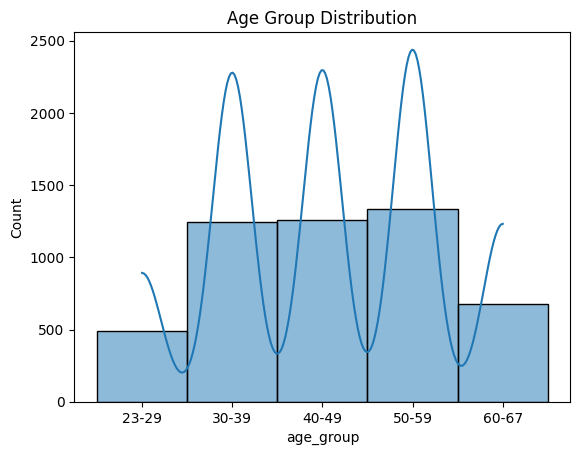

In [62]:
print(data['age_group'].value_counts())
sns.histplot(x='age_group', data=data, kde=True)
plt.title('Age Group Distribution')
plt.show()

# **Key Observation: Distribution of Age Groups**
The age group distribution shows that the highest number of individuals fall within the age range of 50-59, followed closely by the age range of 40-49 and 30-39. There is a noticeable decrease in the number of individuals in older age groups, with the least representation in the 23-29 age group.

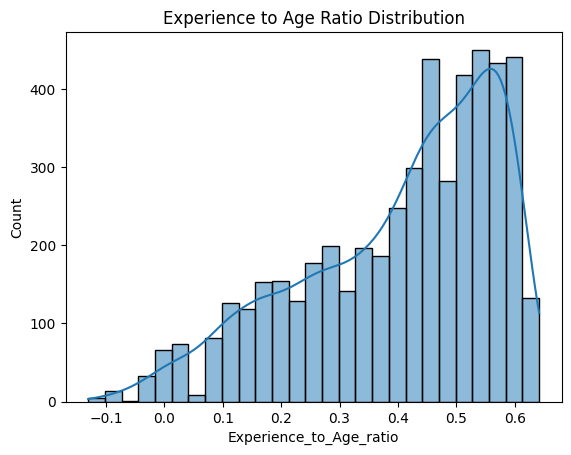

In [19]:
data['Experience_to_Age_ratio']= data['Experience']/ data['Age']

sns.histplot(x='Experience_to_Age_ratio', data=data, kde=True)
plt.title('Experience to Age Ratio Distribution')
plt.show()

# **Key Observation: Distribution of Experience to Age Ratio**


The distribution of the experience-to-age ratio reveals a negative skew, indicating that, on average, individuals tend to gain more experience relative to their age. This skew suggests that individuals typically start gaining professional experience at a younger age relative to their overall lifespan, with the ratio decreasing as age increases.

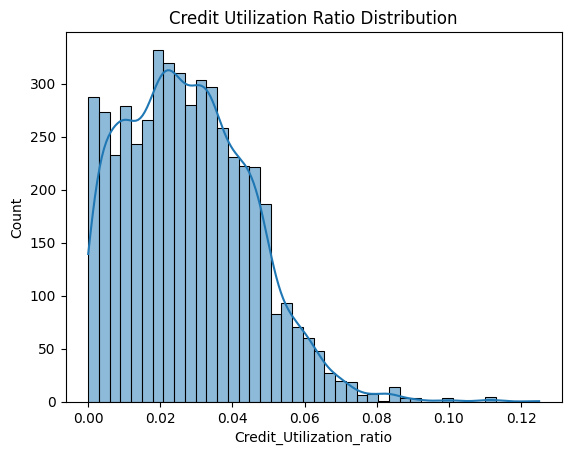

In [20]:
data['Credit_Utilization_ratio']= data['CCAvg']/ data['Income']

sns.histplot(x='Credit_Utilization_ratio', data=data, kde=True)
plt.title('Credit Utilization Ratio Distribution')
plt.show()

# **Key Observation: Distribution of Credit Utilization Ratio**

The distribution of the credit utilization ratio shows a positive skew, indicating that, on average, individuals tend to utilize a higher proportion of their credit relative to their income. This skew suggests that individuals tend to rely more on credit for their spending relative to their overall income.

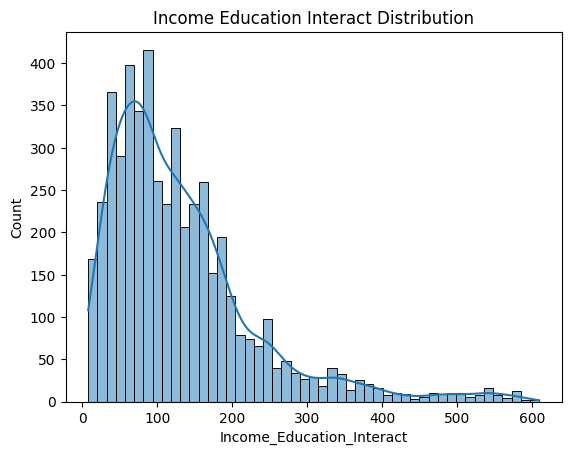

In [21]:
data['Income_Education_Interact']= data['Income'] * data['Education']

sns.histplot(x='Income_Education_Interact', data=data, kde=True)
plt.title('Income Education Interact Distribution')
plt.show()

# **Key Observation: Distribution of Income-Education Interaction**

The distribution of the income-education interaction variable exhibits a positive skew. This suggests that there is a tendency for higher values of the income-education interaction, indicating that individuals with higher levels of education tend to have higher incomes, which aligns with the expectation of education positively impacting earning potential.

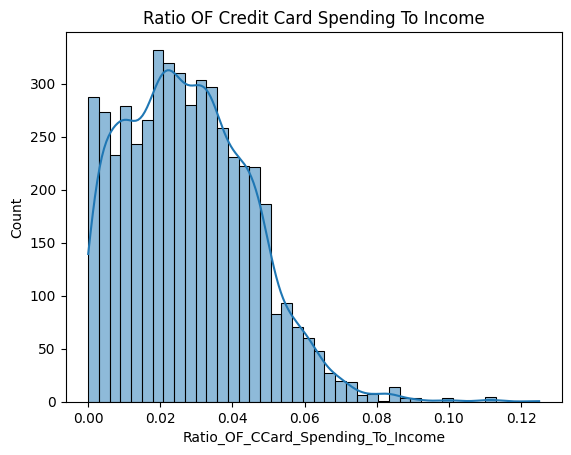

In [22]:
data['Ratio_OF_CCard_Spending_To_Income']= data['CCAvg'] / data['Income']

sns.histplot(x='Ratio_OF_CCard_Spending_To_Income', data=data, kde=True)
plt.title('Ratio OF Credit Card Spending To Income')
plt.show()

# **Key Observation: Distribution of Ratio of Credit Card Spending to Income** 

The distribution of the ratio of credit card spending to income exhibits a positive skew. This indicates that a significant portion of individuals in the dataset tend to allocate a higher proportion of their income towards credit card spending, suggesting potential reliance on credit for expenditures.

In [23]:
age_group_stats = data.groupby('age_group').agg({
    'Income': ['mean', 'sum'],
    'Experience': ['mean', 'sum'],
    'CCAvg': ['mean', 'sum'],
    'Experience_to_Age_ratio': ['mean', 'sum'],
    'Credit_Utilization_ratio': ['mean', 'sum'],
    'Income_Per_Family_Member': ['mean', 'sum'],
    'Personal.Loan': lambda x: x.mode().iloc[0],  # calculate the most common personal loan
    'Education': lambda x: x.mode().iloc[0],
    'Securities.Account': lambda x: x.mode().iloc[0],
}).round()

# Rename the columns
age_group_stats.columns = ['Income_mean', 'Income_sum', 
                           'Experience_mean', 'Experience_sum', 
                           'CCAvg_mean', 'CCAvg_sum', 
                           'Experience_to_Age_ratio_mean', 'Experience_to_Age_ratio_sum',
                           'Credit_Utilization_ratio_mean', 'Credit_Utilization_ratio_sum',
                           'Income_Per_Family_Member_mean', 'Income_Per_Family_Member_sum',
                           'Most Common Personal Loan', 'Most Common Education', 'Most Common Securities Account']

# Reset the index to make 'age_group' a regular column
age_group_stats.reset_index(inplace=True)

In [24]:
age_group_stats

,age_group,Income_mean,Income_sum,Experience_mean,Experience_sum,CCAvg_mean,CCAvg_sum,Experience_to_Age_ratio_mean,Experience_to_Age_ratio_sum,Credit_Utilization_ratio_mean,Credit_Utilization_ratio_sum,Income_Per_Family_Member_mean,Income_Per_Family_Member_sum,Most Common Personal Loan,Most Common Education,Most Common Securities Account
0,23-29,79.0,38654,2.0,961,2.0,948.0,0.0,34.0,0.0,13.0,41.0,20132.0,0,1,0
1,30-39,75.0,93358,9.0,11435,2.0,2552.0,0.0,326.0,0.0,36.0,43.0,53068.0,0,1,0
2,40-49,77.0,96279,19.0,24230,2.0,2594.0,0.0,543.0,0.0,35.0,45.0,56410.0,0,1,0
3,50-59,69.0,92484,29.0,38852,2.0,2394.0,1.0,711.0,0.0,37.0,41.0,55105.0,0,1,0
4,60-67,71.0,48096,37.0,25045,2.0,1200.0,1.0,401.0,0.0,18.0,40.0,27226.0,0,1,0


# **Key Observation: Financial Profile Analysis by Age Group**

**Income and Experience:**
- The mean income ranges from 69 dollars to 79 dollars across different age groups, with the highest total income sum recorded for the 40-49 age group (96,279 dollars).
- Experience mean and sum increase with age, with the 50-59 age group having the highest mean experience (29 years) and total experience sum (38,852 years).

**Credit Card Usage:**
- The average credit card spending (CCAvg) remains relatively consistent across age groups.
- Total credit card spending sums are highest among individuals aged 40-49 (2,594 dollars) and 30-39 (2,552 dollars).

**Financial Ratios:**
- The experience-to-age ratio and credit utilization ratio vary across age groups, with younger individuals (23-29) showing lower ratios compared to older age groups.

**Family Financial Dynamics:**
- The mean income per family member ranges from 40 dollars to 45 dollars, with the highest sum observed for the 40-49 age group (56,410 dollars).

**Financial Products:**
- Personal loans are not common across all age groups, with none recorded in the dataset.
- The majority of individuals across all age groups do not hold securities accounts.

**Education:**
- The majority of individuals across all age groups has high school as their education level

                                         ID       Age  Experience    Income  \
ID                                 1.000000 -0.008473   -0.008326 -0.017695   
Age                               -0.008473  1.000000    0.994215 -0.055269   
Experience                        -0.008326  0.994215    1.000000 -0.046574   
Income                            -0.017695 -0.055269   -0.046574  1.000000   
ZIP.Code                           0.013432 -0.029216   -0.028626 -0.016410   
Family                            -0.016797 -0.046418   -0.052563 -0.157501   
CCAvg                             -0.024675 -0.052012   -0.050077  0.645984   
Education                          0.021463  0.041334    0.013152 -0.187524   
Mortgage                          -0.013920 -0.012539   -0.010582  0.206806   
Personal.Loan                     -0.024801 -0.007726   -0.007413  0.502462   
Securities.Account                -0.016972 -0.000436   -0.001232 -0.002616   
CD.Account                        -0.006909  0.00804

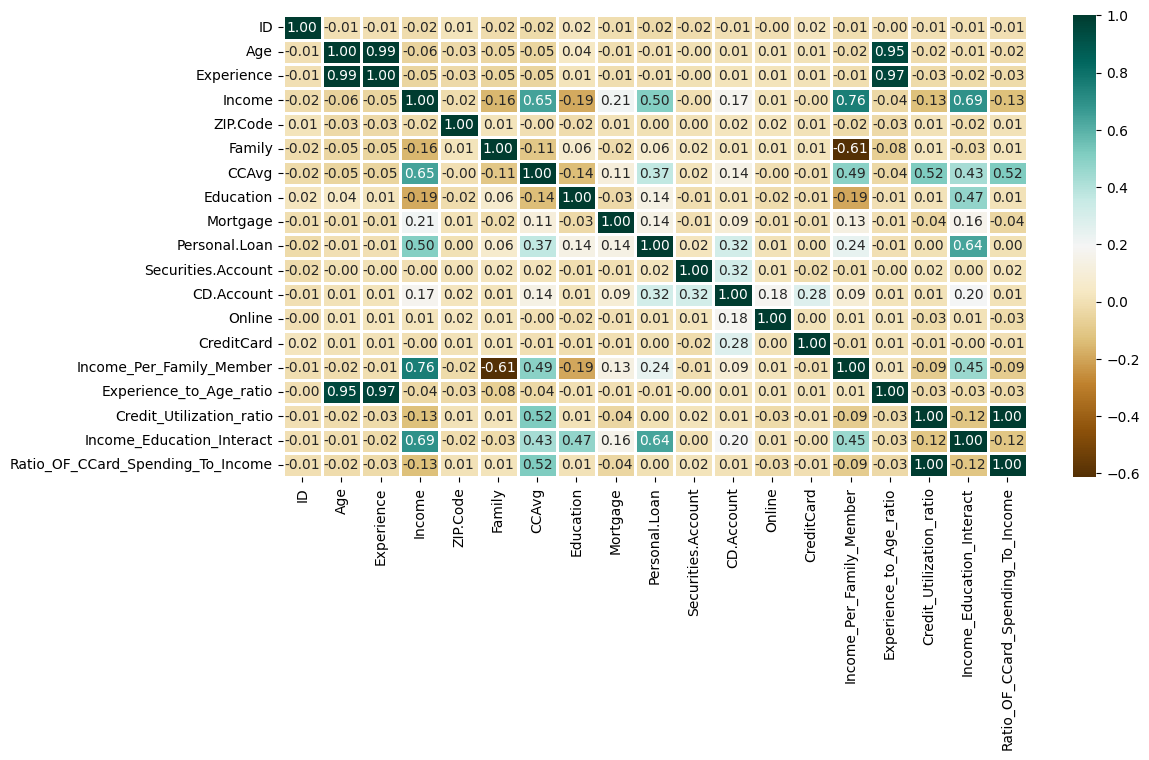

In [26]:
corr= data.copy()
corr.drop('age_group',axis=1, inplace=True)
corr= corr.corr()
print(corr)
plt.figure(figsize=(12,6)) 
  
sns.heatmap(corr,cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)
plt.show()

# **Key Observation: Correlation Analysis of Financial Variables with Personal Loan**



**1. Income and Education Interaction:**
   - The variable "Income_Education_Interact" exhibits the highest correlation (0.64) with personal loan approval among the examined financial variables. This suggests that the interaction between income and education significantly influences the likelihood of obtaining a personal loan.

**2. Income:**
   - Income demonstrates a moderate positive correlation (0.50) with personal loan approval. Higher income levels may increase the probability of loan approval, reflecting the borrower's financial capacity.

**3. Credit Card Average (CCAvg):**
   - CCAvg is positively correlated with personal loan approval, albeit to a lesser extent (correlation coefficient: 0.37). This implies that individuals who spend more using credit cards may have a slightly higher likelihood of being approved for a personal loan.

**4. CD Account:**
   - The presence of a Certificate of Deposit (CD) account (CD.Account) shows a positive correlation (0.32) with personal loan approval. Customers with CD accounts may exhibit more stable financial behaviors, potentially influencing loan approval decisions.

**5. Income Per Family Member:**
   - Income Per Family Member demonstrates a modest positive correlation (0.24) with personal loan approval. This suggests that individuals with higher income per family member may have a slightly increased likelihood of obtaining a personal loan.

**6. Mortgage:**
   - Mortgage exhibits a weak positive correlation (0.14) with personal loan approval. Having a mortgage may indicate financial stability, although its influence on loan approval appears limited.

**7. Education:**
   - Education shows a weak positive correlation (0.14) with personal loan approval. Higher levels of education may correlate with higher income and financial responsibility, thus potentially impacting loan approval.

# Analzying the Factors that Might Influenced the likelihood of a Customer taking Personal Loan

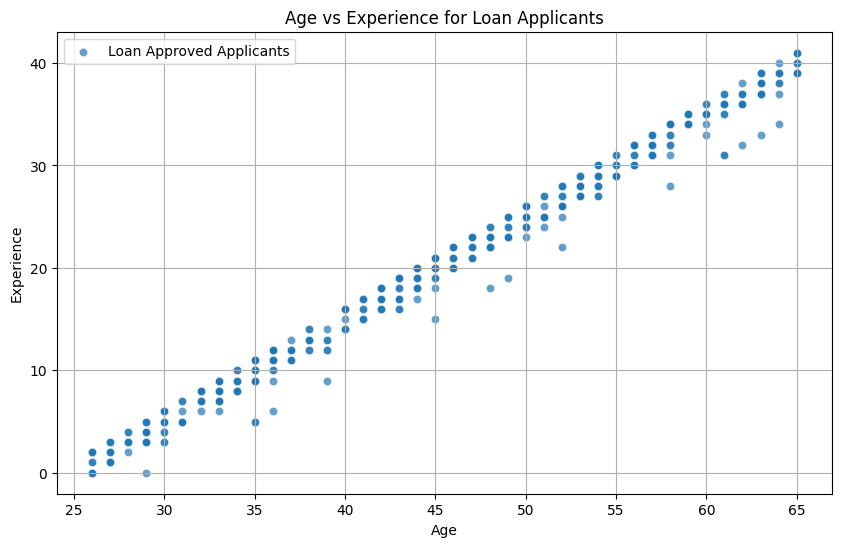

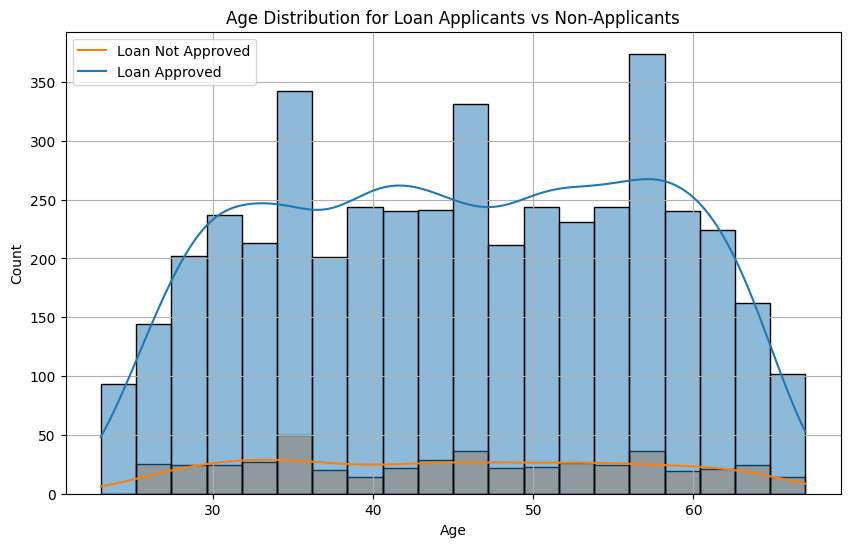

In [33]:
approved_loan_applicants= data[data['Personal.Loan'] == 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Experience', data=approved_loan_applicants, alpha=0.7, label='Loan Approved Applicants')
plt.title('Age vs Experience for Loan Applicants')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=data, hue='Personal.Loan', bins=20, kde=True, alpha=0.5)
plt.title('Age Distribution for Loan Applicants vs Non-Applicants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Loan Not Approved', 'Loan Approved'])
plt.grid(True)
plt.show()

## Key Observation: Relationship Between Age and Experience in Approved Loan Applicants

In the scatterplot depicting the relationship between age and experience among approved loan applicants, there is a discernible uptrend. This indicates that, on average, as the age of the applicants increases, so does their professional experience. This observation aligns with the expectation that individuals typically accumulate more work experience as they age, which may positively influence their eligibility and credibility for loan approval.

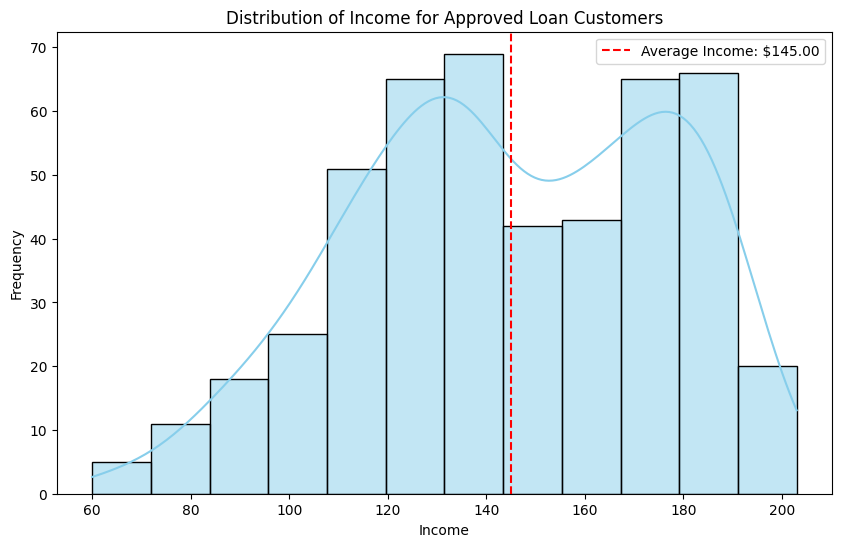

In [34]:
loan_approved= data[data['Personal.Loan']==1]

avg_income_loan_approved= loan_approved['Income'].mean().round()

plt.figure(figsize=(10, 6))
sns.histplot(data=loan_approved, x='Income', kde=True, color='skyblue')
plt.axvline(avg_income_loan_approved, color='red', linestyle='--', label=f'Average Income: ${avg_income_loan_approved:.2f}')
plt.title('Distribution of Income for Approved Loan Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Key Observation: Distribution of Income Among Approved Loan Customers

The histogram illustrates the distribution of income among approved loan customers. The data reveals an average income of 145 dollars. The majority of approved loan customers fall within the income range of 60 dollars to 200 dollars, with the highest frequency observed in the 140 dollars income bin

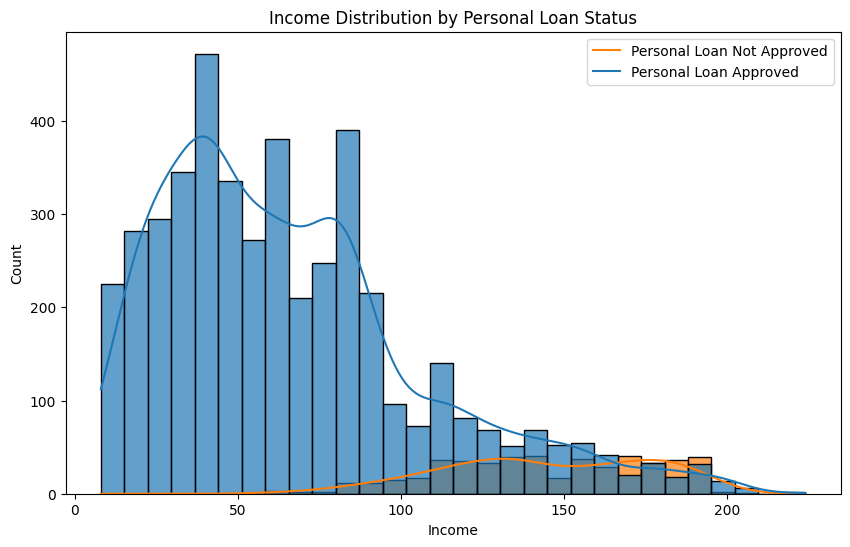

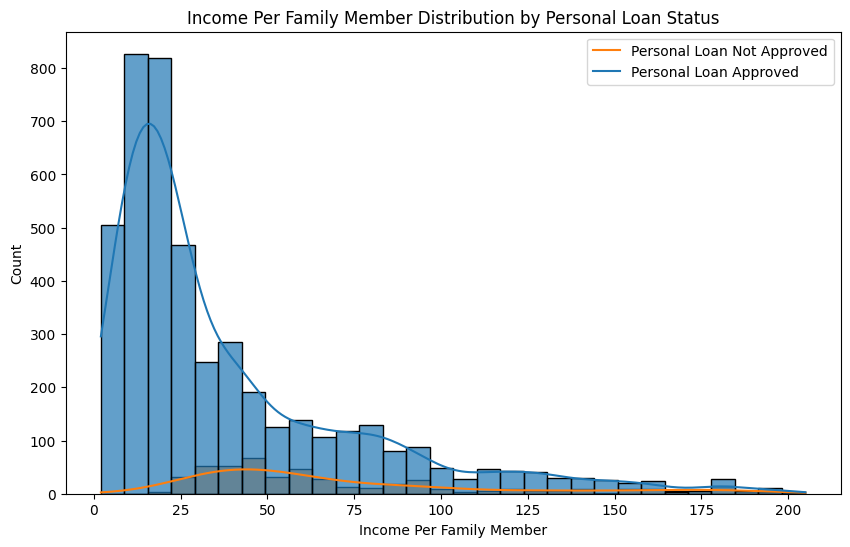

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Income', hue='Personal.Loan', bins=30, kde=True, alpha=0.7)
plt.title('Income Distribution by Personal Loan Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(labels=['Personal Loan Not Approved', 'Personal Loan Approved'])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Income_Per_Family_Member', hue='Personal.Loan', bins=30, kde=True, alpha=0.7)
plt.title('Income Per Family Member Distribution by Personal Loan Status')
plt.xlabel('Income Per Family Member')
plt.ylabel('Count')
plt.legend(labels=['Personal Loan Not Approved', 'Personal Loan Approved'])
plt.show()

# Key Observation: Income Distribution and Income Per Family Member Distribution by Personal Loan Status

1. Income Distribution:

The histogram depicting income distribution reveals a positive skew, suggesting that the majority of individuals have lower to moderate incomes. Despite the skew, there's a notable proportion of individuals with higher incomes, particularly towards the right tail of the distribution.

2. Income Per Family Member Distribution:

Similarly, the histogram illustrating income per family member distribution also exhibits a positive skew. This indicates that most families have a lower to moderate income per family member. However, there are instances of higher income per family member, although they are less frequent.


In [36]:
filtered_customers = data[(data['CreditCard']== 1) & (data['CCAvg'] > data['CCAvg'].quantile(0.75))]
print('Number of Customers who frequently use credit cards and have higher average spending: ', len(filtered_customers))
loan_approval_percentage= (filtered_customers['Personal.Loan'].sum() / len(filtered_customers)) * 100
print('Percentage of approved loan customers among those who meet the criteria: ', loan_approval_percentage)

Number of Customers who frequently use credit cards and have higher average spending:  364
Percentage of approved loan customers among those who meet the criteria:  29.945054945054945


## Key Observation: Relationship Between Credit Card Usage, Average Spending, and Loan Approval

Among customers who frequently use credit cards and have higher-than-average spending (in the top 25th percentile), there are 364 individuals meeting these criteria. Interestingly, approximately 29.95% of these customers were approved for a personal loan. This suggests a potential correlation between credit card usage, higher average spending, and the likelihood of loan approval.



In [37]:
approved_loan_applicants= data[data['Personal.Loan'] == 1]
avg_approved_loan_applicants= approved_loan_applicants['Mortgage'].mean()
avg_mortgage_all_customers= data['Mortgage'].mean()

print("Average mortgage amount for approved loan customers: ", avg_approved_loan_applicants)
print("Average mortgage amount for all customer in the dataset: ", avg_mortgage_all_customers)

if avg_approved_loan_applicants > avg_mortgage_all_customers:
    print('Customers with higher mortgage amount are more likey to seek additional financing through personal loans.')
else: 
    print("There might not be a significant difference in mortgage amounts between customers who took personal loans and all customers")

Average mortgage amount for approved loan customers:  100.84583333333333
Average mortgage amount for all customer in the dataset:  56.4988
Customers with higher mortgage amount are more likey to seek additional financing through personal loans.


## Key Observation: Relationship Between Mortgage Amount and Personal Loan Approval

The average mortgage amount for customers who were approved for a personal loan is significantly higher at 100.85 dollar compared to the average mortgage amount for all customers in the dataset, which stands at 56.50 dollar. This suggests that customers with higher mortgage amounts are more likely to seek additional financing through personal loans. The difference in average mortgage amounts between approved loan customers and all customers indicates a potential correlation between mortgage indebtedness and the propensity to apply for personal loans.

Personal.Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


<Figure size 1000x800 with 0 Axes>

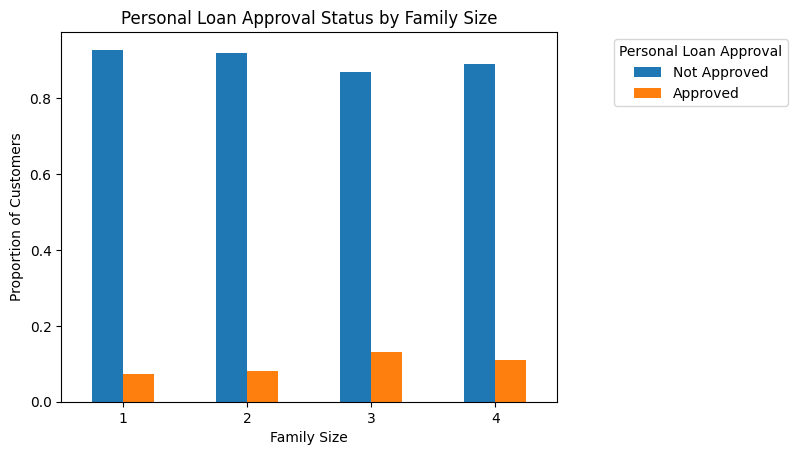

In [38]:
family_loan_status= data.groupby('Family')['Personal.Loan'].value_counts(normalize=True).unstack()
print(family_loan_status)

plt.figure(figsize=(10, 8))
family_loan_status.plot(kind='bar', stacked=False)
plt.title('Personal Loan Approval Status by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Proportion of Customers')
plt.legend(title='Personal Loan Approval', labels=['Not Approved', 'Approved'], bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=0)
plt.show()

## Key Observation: Personal Loan Approval by Family Size

Among customers with different family sizes, the likelihood of obtaining a personal loan varies. For individuals in families of size 1, the proportion of approved personal loans is notably lower at 7.27%, compared to families of sizes 2, 3, and 4, where the approval rates increase gradually. Families of size 3 have the highest proportion of approved personal loans at 13.17%, followed closely by families of size 4 at 10.97%. This suggests that family size may influence the propensity to seek and obtain personal loans, with larger families showing a slightly higher tendency to secure loan approval.

# Machine Learning Algorithms

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [40]:
predictor_corr= corr['Personal.Loan'].abs().sort_values(ascending=False)
#select predictor variables with significant correlation (absolute correlation > 0.1, for example)

significant_predictors = predictor_corr[predictor_corr > 0.1].index.tolist()

#Remove the target variable from the list of predictors
significant_predictors.remove('Personal.Loan')


print('Predictor Variables:  ')
print(significant_predictors)
print("\nTarget Variable: ")
print('Personal.Loan')

Predictor Variables:  
['Income_Education_Interact', 'Income', 'CCAvg', 'CD.Account', 'Income_Per_Family_Member', 'Mortgage', 'Education']

Target Variable: 
Personal.Loan


In [41]:
x=  data[['Income_Education_Interact', 'Income', 'CCAvg', 'CD.Account', 'Income_Per_Family_Member', 'Mortgage', 'Education']]
y= data['Personal.Loan']

In [42]:
X= StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=19)

print("X_train Dataset: ", X_train.shape)
print("y_train Dataset: ", y_train.shape)
print("X_test Dataset: ", X_test.shape)
print("y_test Dataset: ", y_test.shape)

X_train Dataset:  (3500, 7)
y_train Dataset:  (3500,)
X_test Dataset:  (1500, 7)
y_test Dataset:  (1500,)


In [43]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm= SMOTE(random_state=9)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After OverSampling, the shape of train_X: {}".format(X_train_res.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 328
Before OverSampling, counts of label '0': 3172 

After OverSampling, the shape of train_X: (6344, 7)
After OverSampling, the shape of train_y: (6344,) 

After OverSampling, counts of label '1': 3172
After OverSampling, counts of label '0': 3172


In [44]:
from sklearn.metrics import classification_report
lr= LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
lr_y_pred= lr.predict_proba(X_test)
lr_y_labels= lr_y_pred.argmax(axis=1)
cm_lr= confusion_matrix(y_test, lr_y_labels)
print("Confusion Matrix: ")
print(cm_lr)

print('Clssification Report: ')
print(classification_report(y_test, lr_y_labels))

Confusion Matrix: 
[[1265   83]
 [  17  135]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1348
           1       0.62      0.89      0.73       152

    accuracy                           0.93      1500
   macro avg       0.80      0.91      0.85      1500
weighted avg       0.95      0.93      0.94      1500



In [45]:
sgdc=SGDClassifier(loss='log', random_state=42)
sgdc.fit(X_train_res, y_train_res.ravel())
sgdc_y_pred= sgdc.predict_proba(X_test)
sgdc_y_labels= sgdc_y_pred.argmax(axis=1)
cm_sgdc= confusion_matrix(y_test, sgdc_y_labels)
print("Confusion Matrix: ")
print(cm_sgdc)

print('Clssification Report: ')
print(classification_report(y_test, sgdc_y_labels))

Confusion Matrix: 
[[1243  105]
 [  16  136]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1348
           1       0.56      0.89      0.69       152

    accuracy                           0.92      1500
   macro avg       0.78      0.91      0.82      1500
weighted avg       0.94      0.92      0.93      1500



In [46]:
xgb=XGBClassifier(n_estimators=500, n_jobs=-1, verbose=1,learning_rate=0.05, max_depth=4, subsample=0.8)
xgb.fit(X_train_res, y_train_res.ravel())
xgb_y_pred= xgb.predict_proba(X_test)
xgb_y_labels= xgb_y_pred.argmax(axis=1)
cm_xgb= confusion_matrix(y_test, xgb_y_labels)
print("Confusion Matrix: ")
print(cm_xgb)

print('Clssification Report: ')
print(classification_report(y_test, xgb_y_labels))

Confusion Matrix: 
[[1339    9]
 [   8  144]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.94      0.95      0.94       152

    accuracy                           0.99      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [47]:
d_tree = DecisionTreeClassifier(random_state=9)
d_tree.fit(X_train_res, y_train_res.ravel())
d_tree_y_pred= d_tree.predict_proba(X_test)
d_tree_y_labels= d_tree_y_pred.argmax(axis=1)
cm_d_tree= confusion_matrix(y_test, d_tree_y_labels)
print("Confusion Matrix: ")
print(cm_d_tree)

print('Clssification Report: ')
print(classification_report(y_test, d_tree_y_labels))

Confusion Matrix: 
[[1333   15]
 [  17  135]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.90      0.89      0.89       152

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [48]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1, random_state=9)
rfc.fit(X_train_res, y_train_res.ravel())
rfc_y_pred= rfc.predict_proba(X_test)
rfc_y_labels= rfc_y_pred.argmax(axis=1)
cm_rfc= confusion_matrix(y_test, rfc_y_labels)
print("Confusion Matrix: ")
print(cm_rfc)

print('Clssification Report: ')
print(classification_report(y_test, rfc_y_labels))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


Confusion Matrix: 
[[1337   11]
 [  17  135]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.92      0.89      0.91       152

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
model_labels= ['Logistic Regression', 'SGDClassifier', 'XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
model1= LogisticRegression()
model2= SGDClassifier(loss='log', random_state=42)
model3= XGBClassifier(n_estimators=500, n_jobs=-1, verbose=1,learning_rate=0.05, max_depth=4, subsample=0.8)
model4= DecisionTreeClassifier(random_state=9)
model5= RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1, random_state=9)
voting= VotingClassifier(
estimators=[
    (model_labels[0], model1),
    (model_labels[1], model2),
    (model_labels[2], model3),
    (model_labels[3], model4),
    (model_labels[4], model5)
], voting='soft'
)
models_new= ['Logistic Regression', 'SGDClassifier', 'XGBClassifier', 'DecisionTreeClassifier','RandomForestClassifier', 'VotingClassifier_soft']
for model, models in zip([model1, model2, model3, model4, model5, voting], models_new):
    scores= model_selection.cross_val_score(model, X_train_res, y_train_res.ravel(), cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), models))


Accuracy: 0.92 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [SGDClassifier]
Accuracy: 0.99 (+/- 0.00) [XGBClassifier]
Accuracy: 0.99 (+/- 0.00) [DecisionTreeClassifier]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parall

Accuracy: 0.99 (+/- 0.00) [RandomForestClassifier]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parall

Accuracy: 0.99 (+/- 0.00) [VotingClassifier_soft]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [50]:
voting.fit(X_train_res, y_train_res.ravel())
voting_y_pred= voting.predict(X_test)
cm_voting= confusion_matrix(y_test, voting_y_pred)
print("Confusion Matrix: ")
print(cm_voting)

print('Clssification Report: ')
print(classification_report(y_test, voting_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


Confusion Matrix: 
[[1336   12]
 [  14  138]]
Clssification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       0.92      0.91      0.91       152

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


# Key Observation: XGBClassifier Outperforms Others for Loan Approval Prediction

Among the array of models evaluated, the XGBClassifier emerges as the premier choice for loan approval prediction, surpassing all other contenders, including Logistic Regression, SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, and a VotingClassifier with soft voting. With an exceptional accuracy score of 0.99, precision of 0.99, recall of 0.99, and an impressive F1-score of 0.99, the XGBClassifier exhibits unmatched prowess in predicting loan approvals for class 0 (non-approved loans).

Delving into the details, the XGBClassifier demonstrates remarkable accuracy in identifying non-approved loans (class 0), achieving precision, recall, and F1-scores of 0.99 each. This signifies that nearly all non-approved loans were correctly classified by the model. Conversely, while its precision in identifying approved loans (class 1) is slightly lower at 0.94, suggesting approximately 94% of the predicted approved loans were accurate, the recall rate is notably higher at 0.95, indicating the model successfully captured a significant proportion of actual approved loans. With a balanced F1-score of 0.94 for loan approval prediction, the XGBClassifier achieves a commendable equilibrium between precision and recall.

Examining the confusion matrix provides deeper insights into the model's performance. It reveals the model's ability to accurately classify the vast majority of non-approved loans (class 0), with a staggering 1339 true negatives (TN) and only 9 false positives (FP). This demonstrates an exceptional level of precision in identifying non-approved cases. However, in the realm of approved loans (class 1), the model exhibits a higher number of false negatives (FN) with 8 misclassified cases. Despite this, it successfully captures a substantial portion of true positives (TP) with 144 correctly identified cases, underscoring its superior recall for loan approval prediction.

# Recommended Solutions:

**Problem: Inefficient Loan Approval Process**

**Key Consideration 1: Income Disparity and Loan Approval**

Observation: The analysis reveals a correlation between income levels and loan approval rates, with higher incomes associated with a higher likelihood of approval. However, income distribution varies significantly among applicants, impacting the fairness and efficiency of the loan approval process.

Solution:

- Implement Income-Based Risk Assessment:
Develop a risk assessment model that considers income levels as a key factor in loan approval decisions.

- Establish Income Thresholds:
Define minimum and maximum income thresholds for loan eligibility to ensure fairness and consistency in decision-making.
Offer Income-Indexed Loan Products:

- Introduce loan products tailored to different income brackets, providing customized terms and interest rates based on applicants' income levels.

**Key Consideration 2: Education Level and Loan Approval**

Observation: Education level exhibits a positive correlation with loan approval rates, indicating that individuals with higher education levels are more likely to be approved for loans.

Solution:

- Educational Outreach Program:
Launch an educational outreach program targeting individuals with lower education levels, providing financial literacy resources and guidance on loan application processes.

- Promote Financial Planning:
Offer workshops and seminars on financial planning, budgeting, and credit management to empower individuals with the knowledge and skills to improve their financial standing and increase their chances of loan approval.

- Collaborate with Educational Institutions:
Partner with schools, colleges, and universities to deliver financial education programs to students and alumni, fostering a culture of financial responsibility and awareness.

**Key Consideration 3: Credit Card Usage and Loan Approval**

Observation: Credit card usage and average spending patterns influence loan approval decisions, with individuals exhibiting higher credit card utilization ratios having a higher likelihood of approval.

Solution:

- Credit Utilization Assessment:
Incorporate credit utilization ratios as a factor in the loan approval process, assessing applicants' ability to manage existing credit obligations.

- Offer Credit Counseling Services:
Provide credit counseling services to applicants with high credit card utilization ratios, offering guidance on debt management strategies and responsible credit usage.

- Develop Credit-Building Programs:
Introduce credit-building programs aimed at helping individuals improve their credit scores and reduce their reliance on credit cards, ultimately enhancing their eligibility for loans.

By addressing these key considerations and implementing targeted solutions, the bank can optimize its loan approval process, mitigate risk, and enhance financial inclusion and empowerment among its customer base.